## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Train-Test Splitting the Data

In [2]:
malignancy_df = pd.read_csv('data/data.csv')
malignancy_Y_df = malignancy_df['diagnosis']
malignancy_Y_df = malignancy_Y_df.replace('M', -1)
malignancy_Y_df = malignancy_Y_df.replace('B', 1)
malignancy_X_df = malignancy_df.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(malignancy_X_df, malignancy_Y_df, test_size=0.2, random_state=42)
X_train.to_csv('data/train.csv', header=True)
Y_train.to_csv('data/train_labels.csv', header=True)
X_test.to_csv('data/test.csv', header=True)
Y_test.to_csv('data/test_labels.csv', header=True)

## Re-Reading in Without Headers

In [3]:
X_train = pd.read_csv('data/train.csv').values[:,:-1]
X_test = pd.read_csv('data/test.csv').values[:,:-1]
Y_train = pd.read_csv('data/train_labels.csv').values[:,1:]
Y_test = pd.read_csv('data/test_labels.csv').values[:,1:]

## Standardizing the Data

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## SVM Model

In [7]:
class BinarySVM():
    def __init__(self, C=0.0001, max_iterations=100, learning_rate=0.001):
        ''' Constructor to make our objects. To be defined. '''
        self.C = C
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
            
    def fit(self, X_train, Y_train):
        ''' Method to fit, or train our SVM model(s). To be defined. '''
        # (Step 1): Randomly set the weights
        self.weights = np.random.random((X_train.shape[1],))
        # (Step 2): Train the weights for self.max_iterations
        for iteration in range(self.max_iterations):
            iteration_loss = 0
            iteration_loss+=(0.5*np.dot(self.weights,self.weights))
            iteration_weights = self.weights
            for point_num in range(X_train.shape[0]):
                y_i = Y_train[point_num][0]
                x_i = X_train[point_num]
                if y_i*np.dot(self.weights,x_i) < 1:
                    self.weights-=(self.learning_rate*(self.weights-self.C*y_i*x_i))
                    iteration_loss+=self.C*(1-y_i*np.dot(iteration_weights,x_i))
                else:
                    self.weights-=(self.learning_rate*(self.weights))
            print("Iteration #" + str(iteration) + " -- iteration loss: " + str(iteration_loss))
                
    def predict(self, X_test):
        ''' Method to run prediction, or testing on our given SVM model(s). To be defined. '''
        predicted_labels = []
        for test_index in range(X_test.shape[0]):
            predicted_label = np.dot(self.weights,X_test[test_index])
            if predicted_label >= 0:
                predicted_labels.append(1)
            else:
                predicted_labels.append(-1)
        return predicted_labels

In [8]:
binary_svm = BinarySVM()
binary_svm.fit(X_train, Y_train)

Iteration #0 -- iteration loss: 5.126525451225338
Iteration #1 -- iteration loss: 2.1452960543818884
Iteration #2 -- iteration loss: 0.9248394010131086
Iteration #3 -- iteration loss: 0.4208330293173082
Iteration #4 -- iteration loss: 0.20997530069771408
Iteration #5 -- iteration loss: 0.12021020490198026
Iteration #6 -- iteration loss: 0.08097955745420721
Iteration #7 -- iteration loss: 0.0631922616135502
Iteration #8 -- iteration loss: 0.05479399258377941
Iteration #9 -- iteration loss: 0.05061220844539252
Iteration #10 -- iteration loss: 0.04841988235023965
Iteration #11 -- iteration loss: 0.047214437209264354
Iteration #12 -- iteration loss: 0.04652431455734039
Iteration #13 -- iteration loss: 0.04611653989472849
Iteration #14 -- iteration loss: 0.04586994617832972
Iteration #15 -- iteration loss: 0.04571838281891815
Iteration #16 -- iteration loss: 0.04562419776435295
Iteration #17 -- iteration loss: 0.045565241268698646
Iteration #18 -- iteration loss: 0.04552816096037178
Iterati

In [9]:
Y_test_pred = binary_svm.predict(X_test)

In [10]:
accuracy = accuracy_score(Y_test, Y_test_pred)
print(accuracy)

0.9649122807017544


## Confusion Matrix

[41  2  2 69]


[[<matplotlib.axis.YTick at 0x121bff128>,
 [Text(0, 0, 'Benign'), Text(0, 0, 'Malignant')],
 Text(0, 0.5, 'True Label'),
 [Text(0, 0, 'Benign'), Text(0, 0, 'Malignant')],
 Text(0.5, 0, 'Predicted Label'),
 Text(0.5, 1.0, 'Tumor Classification Confusion Matrix')]

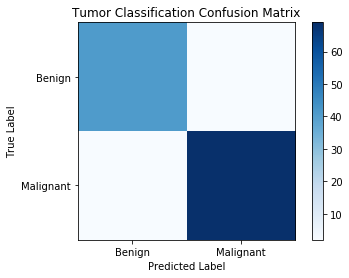

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_test_pred)
print(cm.ravel())
classes = ["Benign", "Malignant"]
cmap = plt.cm.Blues
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), title="Tumor Classification Confusion Matrix", ylabel='True Label', xlabel='Predicted Label', yticklabels=classes, xticklabels=classes)